In [83]:
import numpy as np
import math 
import pylab
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import cm, colors
import random

In [65]:
class Protein(object):
    def __init__(self, sequence, conformation):
        self.sequence = sequence
        self.conformation = conformation
        
    def count_proteins_contacts(self):
        """Для данного белка считает число топологических контактов HH."""
        hh=0
        steps = [(1, 0), (-1, 0), (0, 1),  (0, -1)]
        for i in range(1, len(self.conformation)-1):
            not_topological=[self.conformation [i-1], self.conformation[i+1]]
            for step in steps:
                new_point = (self.conformation[i][0]+step[0], self.conformation [i][1]+step[1] )
                if (new_point in self.conformation  and (new_point not in not_topological)):
                    position = self.conformation.index(new_point)
                    if( self.sequence[position]==1 and self.sequence[i]==1 ):
                        hh=hh+1
        for step in steps:
            new_point_begin = (self.conformation[0][0]+step[0], self.conformation[0][1]+step[1] )
            new_point_end= ( self.conformation[-1][0]+step[0], self.conformation [-1][1]+step[1])
            if(new_point_begin in self.conformation  and new_point_begin!=self.conformation [1]):
                position = self.conformation.index(new_point_begin)
                if( self.sequence[position]==1 and self.sequence[0]==1 ):
                    hh=hh+1
            if( new_point_end in self.conformation  and new_point_end!=self.conformation[-2]):
                position = self.conformation.index(new_point_end) 
                if( self.sequence[position]==1 and self.sequence[-1]==1 ):
                    hh=hh+1
        return hh//2
     

In [31]:
L_min=2
L_max=12
steps = [(1, 0), (-1, 0), (0, 1),  (0, -1)]

In [22]:
one_over_lengths=0
lengths=range(L_min, L_max+1)

for i in lengths:
    one_over_lengths=one_over_lengths+1/i

k=1/one_over_lengths


probabilities = []
for i in lengths:
    probabilities.append(k/i)
    
print(probabilities)
print(sum(probabilities))

[0.23773177132467707, 0.1584878475497847, 0.11886588566233854, 0.09509270852987083, 0.07924392377489235, 0.06792336323562202, 0.05943294283116927, 0.052829282516594904, 0.04754635426493541, 0.04322395842266856, 0.039621961887446176]
0.9999999999999998


In [77]:
np.random.choice(lengths, 1, p=probabilities)[0]

9

In [109]:
st='HHPHPHPHPHHHHPHPPPHPPPHPPPPHPPPHPPPHPHHHHPHPHPHPHH'
length = len(st)
sequence_example=[]
for c in st:
    if c=='H':
        sequence_example.append(1)
    else:
        sequence_example.append(0)
print(sequence_example)
print(len(sequence_example))

[1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1]
50


In [110]:
T = 2.5 #температура фиксирована 
n_interations = 100 #пока фиксирую число итераций так 


In [111]:
start_conformation = [(0, 0)]
for i in range(1,50):
    if (i%8>0 and i%8<4):
        new_coordinate = (start_conformation[-1][0],start_conformation[-1][1]+1)
    elif (i%8>4 and i%8<=7):
        new_coordinate = (start_conformation[-1][0],start_conformation[-1][1]-1)
    else:
        new_coordinate = (start_conformation[-1][0]+1,start_conformation[-1][1])
    start_conformation.append(new_coordinate)
print(start_conformation)
print(len(start_conformation))

[(0, 0), (0, 1), (0, 2), (0, 3), (1, 3), (1, 2), (1, 1), (1, 0), (2, 0), (2, 1), (2, 2), (2, 3), (3, 3), (3, 2), (3, 1), (3, 0), (4, 0), (4, 1), (4, 2), (4, 3), (5, 3), (5, 2), (5, 1), (5, 0), (6, 0), (6, 1), (6, 2), (6, 3), (7, 3), (7, 2), (7, 1), (7, 0), (8, 0), (8, 1), (8, 2), (8, 3), (9, 3), (9, 2), (9, 1), (9, 0), (10, 0), (10, 1), (10, 2), (10, 3), (11, 3), (11, 2), (11, 1), (11, 0), (12, 0), (12, 1)]
50


In [112]:
xplot = []
yplot = []
for i in start_conformation:
    xplot.append(i[0])
    yplot.append(i[1]+4)
markers = list(matplotlib.lines.Line2D.markers)

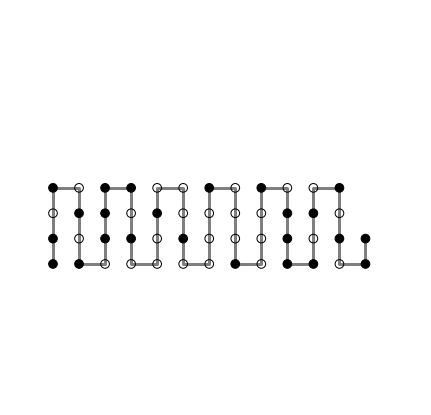

In [114]:
plt.figure(figsize=(7,7 ))

plt.plot(xplot, yplot, '-', color = 'k', lw=3,markersize=9,alpha=0.5)

plt.scatter(xplot, yplot, c=sequence_example, s=75, edgecolors='k',  cmap='Greys', alpha = 1)

plt.xlim(-1, 14)
plt.ylim(-1,14)

plt.axis('off')

plt.grid(True)

In [115]:
p = Protein(sequence_example, start_conformation)
q = p.count_proteins_contacts()
print(q)

5


In [148]:
def D(point1, point2):
    return abs(point2[0]-point1[0]) + abs(point2[1]-point1[1])

# Attempt to implement FRESS


In [170]:
current_conf = start_conformation.copy()
for iteration in range(1):
    
    l = np.random.choice(lengths, 1, p=probabilities)[0] #selected l 
    print(l)
    end = length-l #for e+1
    start_position = random.randint(0,end)
    print(start_position)
    end_position = start_position+l-1

    C_t= current_conf[:start_position]+current_conf[end_position+1:]
    Seq_t=sequence_example[:start_position]+sequence_example[end_position+1:]
    print(C_t)
    p=Protein(Seq_t, C_t)
    E_t=p.count_proteins_contacts()
    print("E_t : ", E_t)
    
    #first move 
    first_moves=[]
    
    for step in steps:
        point = (C_t[start_position-1][0]+step[0], C_t[start_position-1][1]+step[1])
        
        if (point == current_conf[start_position]):
            continue
        if ((point not in C_t )and D(point, current_conf[end_position+1])<=abs(end_position+1-start_position)):
            first_moves.append(point)
            
    if(len(first_moves)==0):
        continue
    else:
        
        
        
    
    
    #for residue in range(l):
        
    
    

5
37
[(0, 0), (0, 1), (0, 2), (0, 3), (1, 3), (1, 2), (1, 1), (1, 0), (2, 0), (2, 1), (2, 2), (2, 3), (3, 3), (3, 2), (3, 1), (3, 0), (4, 0), (4, 1), (4, 2), (4, 3), (5, 3), (5, 2), (5, 1), (5, 0), (6, 0), (6, 1), (6, 2), (6, 3), (7, 3), (7, 2), (7, 1), (7, 0), (8, 0), (8, 1), (8, 2), (8, 3), (9, 3), (10, 2), (10, 3), (11, 3), (11, 2), (11, 1), (11, 0), (12, 0), (12, 1)]
E_t :  4
[(9, 4)]


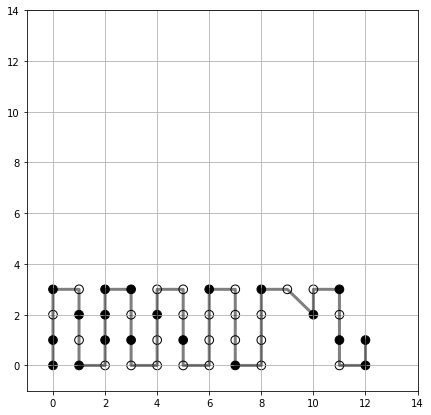

In [171]:
xplot = []
yplot = []
for i in C_t:
    xplot.append(i[0])
    yplot.append(i[1])
markers = list(matplotlib.lines.Line2D.markers)

plt.figure(figsize=(7,7 ))

plt.plot(xplot, yplot, '-', color = 'k', lw=3,markersize=9,alpha=0.5)
#plt.plot(first_moves[0][0], first_moves[0][1])
plt.scatter(xplot, yplot,c=Seq_t,  s=75, edgecolors='k',  cmap='Greys', alpha = 1)

plt.xlim(-1, 14)
plt.ylim(-1,14)

plt.grid(True)